# Exploratory Data Analysis

In [1]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop = stopwords.words('english')
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data
data = pd.read_csv('../data/lyrics_data.csv')

In [3]:
data.head(3)

,Unnamed: 0,Unnamed: 0.1,album_genre,genre,artist,title,explicit_label,lyrics
0,0,0,Folk Rock,NaN,Jim Croce,Top Hat Bar And Grille,False,"Well, if you're lookin' for a good time\nLook ..."
1,1,1,Pop,NaN,Aloe Blacc,The Hand Is Quicker,False,The hand is quicker than the eye\nAnd sometime...
2,2,2,Pop,"[""Pop rock""]",Lionel Richie,Dancing On The Ceiling,False,(Cheering)\nWhoo!\n\nWhat is happening here\nS...


## Balance of Data

In [4]:
le = LabelEncoder()
le.fit(data['explicit_label'])
y = pd.Series(le.transform(data['explicit_label']))
data['explicit_label'] = y

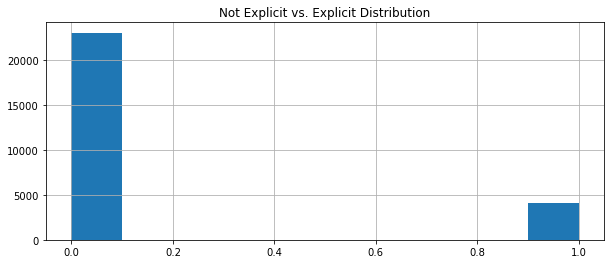

In [5]:
plt.figure(figsize=(10,4))
data['explicit_label'].hist()
plt.title('Not Explicit vs. Explicit Distribution')
plt.show()

## Sentiment Analysis

In [6]:
data['stop_lyrics'] = data['lyrics'].apply(lambda words: ' '.join(str(word).lower() for word in str(words).split() if word not in stop))
data.head(2)

,Unnamed: 0,Unnamed: 0.1,album_genre,genre,artist,title,explicit_label,lyrics,stop_lyrics
0,0,0,Folk Rock,NaN,Jim Croce,Top Hat Bar And Grille,0,"Well, if you're lookin' for a good time\nLook ...","well, lookin' good time look hard want ain't g..."
1,1,1,Pop,NaN,Aloe Blacc,The Hand Is Quicker,0,The hand is quicker than the eye\nAnd sometime...,the hand quicker eye and sometimes truth ain't...


In [7]:
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

In [8]:
def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

In [9]:
data['subjectivity'] = data['stop_lyrics'].apply(getSubjectivity)
data['polarity'] = data['stop_lyrics'].apply(getPolarity)

In [10]:
data.head(2)

,Unnamed: 0,Unnamed: 0.1,album_genre,genre,artist,title,explicit_label,lyrics,stop_lyrics,subjectivity,polarity
0,0,0,Folk Rock,NaN,Jim Croce,Top Hat Bar And Grille,0,"Well, if you're lookin' for a good time\nLook ...","well, lookin' good time look hard want ain't g...",0.627094,0.245423
1,1,1,Pop,NaN,Aloe Blacc,The Hand Is Quicker,0,The hand is quicker than the eye\nAnd sometime...,the hand quicker eye and sometimes truth ain't...,0.343434,0.139899


#### Average and Median Subjectivity and Polary 

In [11]:
# avg/median subjectivity and polary 
print('SUBJECTIVITY')
print('Explicit Mean:      ', data[data['explicit_label']==True]['subjectivity'].mean())
print('Not Explicit Mean:  ', data[data['explicit_label']==False]['subjectivity'].mean())
print('Explicit Median:    ', data[data['explicit_label']==True]['subjectivity'].median())
print('Not Explicit Median:', data[data['explicit_label']==False]['subjectivity'].median())

print('\nPOLARITY')
print('Explicit Mean:      ', data[data['explicit_label']==True]['polarity'].mean())
print('Not Explicit Mean:  ', data[data['explicit_label']==False]['polarity'].mean())
print('Explicit Median:    ', data[data['explicit_label']==True]['polarity'].median())
print('Not Explicit Median:', data[data['explicit_label']==False]['polarity'].median())

SUBJECTIVITY
Explicit Mean:       0.5084924144692267
Not Explicit Mean:   0.4874156654072602
Explicit Median:     0.5155901116427433
Not Explicit Median: 0.5014678948502478

POLARITY
Explicit Mean:       -0.004293749199750737
Not Explicit Mean:   0.09784103803247614
Explicit Median:     0.0
Not Explicit Median: 0.08998834498834499


From this, it is clear that the explicit lyrics tend to be more subjective and polar than the nonexplicit lyrics. However, the difference is light. This will also be shown in the following scatter plot. I expect there to not be much of a distinguishable difference between the points.

#### Scatter Plot of Sentiment

In [12]:
# create sampled data to plot sentiment so the plot does not get too over crowded
explicit_data = data[data['explicit_label']==True]
not_explicit_data = data[data['explicit_label']!=True].sample(n=5000, random_state=1)
sentiment_data = pd.concat([explicit_data, not_explicit_data]).reset_index(drop=True)

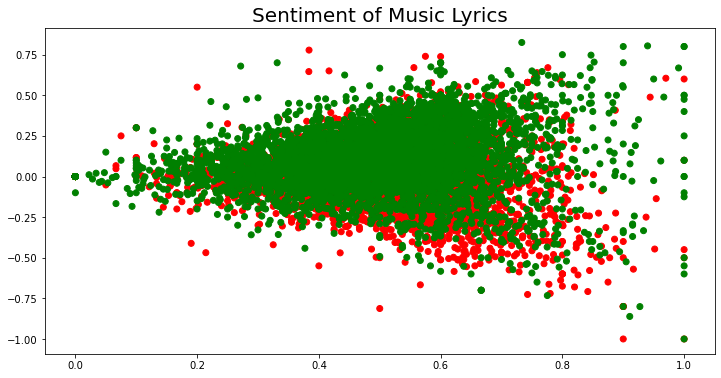

In [13]:
color = ['red' if label == True else 'green' for label in sentiment_data['explicit_label']]
plt.figure(figsize=(12, 6))
plt.scatter(sentiment_data['subjectivity'], sentiment_data['polarity'], color=color)
plt.title('Sentiment of Music Lyrics', fontsize=20)
plt.show()

This is as expected. There really is not much of a clear difference here. Having a more balanced dataset may have been more beneficial in being able to see differences in the sentiment.

## Word Clouds

Another useful way to see the visualize text data is through the use of word clouds. The following shows the word clouds for the explcit and not explicit lyrics.

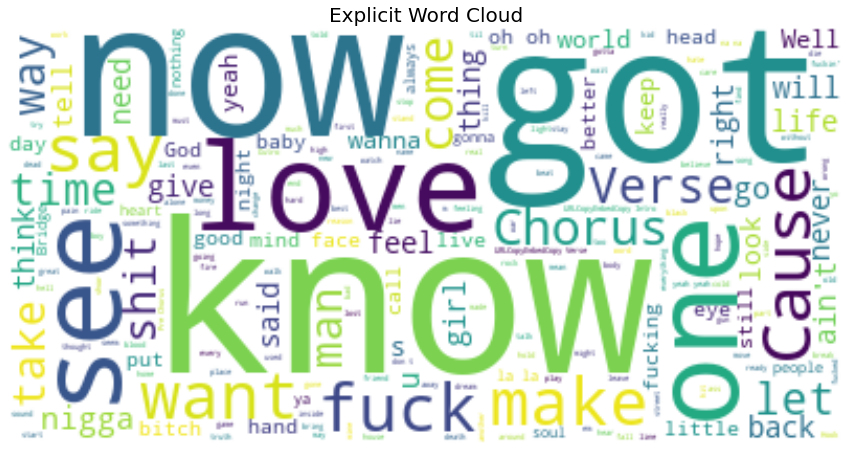

In [14]:
explicit_lyrics = " ".join([str(lyric) for lyric in data[data['explicit_label']==True]['lyrics']])
word_cloud_explicit = WordCloud(background_color="white", random_state=1, max_font_size=100).generate(explicit_lyrics)
plt.figure(figsize=(15, 20))
plt.imshow(word_cloud_explicit, interpolation='bilinear')
plt.axis('off')
plt.title("Explicit Word Cloud", fontsize=20)
plt.show()

Clearly this reflect a word cloud for 

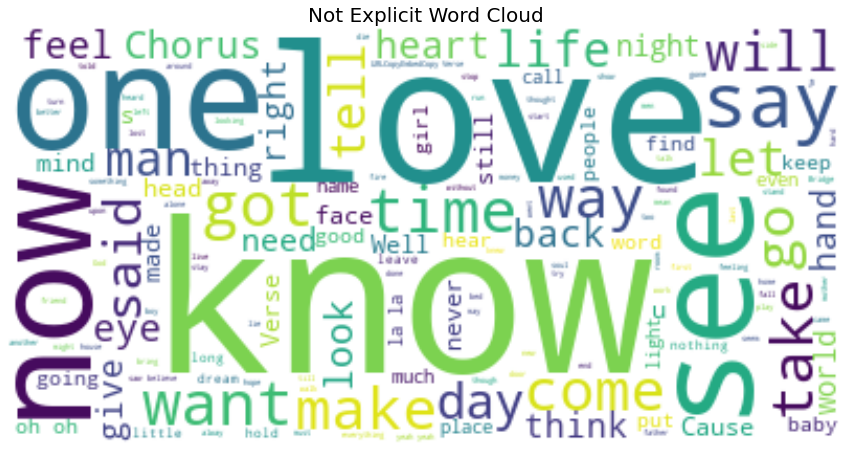

In [15]:
not_explicit_lyrics = " ".join([str(lyric) for lyric in data[data['explicit_label']==False]['lyrics']])
word_cloud_not_explicit = WordCloud(background_color="white", random_state=1, max_font_size=100).generate(not_explicit_lyrics)
plt.figure(figsize=(15, 20))
plt.imshow(word_cloud_not_explicit, interpolation='bilinear')
plt.axis('off')
plt.title("Not Explicit Word Cloud", fontsize=20)
plt.show()